In [63]:
import pytesseract
import sys
import os
import glob
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
import tqdm

In [5]:
path = './train_sample'

In [14]:
paths = os.listdir(path)
tz = os.path.join(path,paths[0])
npa = os.path.join(path,paths[1])

train_sample/npa


In [23]:
tz_pathes = []
for element in os.listdir(tz):
    tz_pathes.append(os.path.join(tz, element))

['train_sample/tz/0093.jpg', 'train_sample/tz/0115.jpg', 'train_sample/tz/0541.jpg', 'train_sample/tz/0137.jpg', 'train_sample/tz/0526.jpg', 'train_sample/tz/0264.jpg', 'train_sample/tz/0344.jpg', 'train_sample/tz/0008.jpg', 'train_sample/tz/0485.jpg', 'train_sample/tz/0043.jpg', 'train_sample/tz/0503.jpg', 'train_sample/tz/0263.jpg', 'train_sample/tz/0380.jpg', 'train_sample/tz/0326.jpg', 'train_sample/tz/0571.jpg', 'train_sample/tz/0100.jpg', 'train_sample/tz/0576.jpg', 'train_sample/tz/0291.jpg', 'train_sample/tz/0440.jpg', 'train_sample/tz/0164.jpg', 'train_sample/tz/0528.jpg', 'train_sample/tz/0026.jpg', 'train_sample/tz/0267.jpg', 'train_sample/tz/0336.jpg', 'train_sample/tz/0092.jpg', 'train_sample/tz/0138.jpg', 'train_sample/tz/0416.jpg', 'train_sample/tz/0132.jpg', 'train_sample/tz/0296.jpg', 'train_sample/tz/0083.jpg', 'train_sample/tz/0281.jpg', 'train_sample/tz/0471.jpg', 'train_sample/tz/0298.jpg', 'train_sample/tz/0493.jpg', 'train_sample/tz/0113.jpg', 'train_sample/tz/00

In [26]:
path_exp = tz_pathes[0]
print(path_exp)

train_sample/tz/0093.jpg


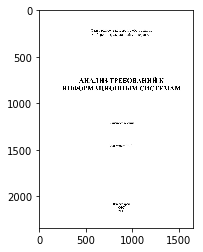

In [33]:
image = cv2.imread(path_exp)
plt.imshow(image)

In [41]:
usr_config = r'-l rus'
output = pytesseract.image_to_string(image,config = usr_config)

In [42]:
print(output)

Федеральное агентство по образованию
Сибирский федеральный университет

АНАЛИЗ ТРЕБОВАНИЙ К
ИНФОРМАЦИОННЫМ СИСТЕМАМ

Конспект лекций

Маглинец Ю.А.

Красноярск
СФУ
2007


In [43]:
filename = '0093.txt'
with open(filename, 'a') as f:
    f.write(output)

In [46]:
os.path.exists(filename)

True

In [74]:
def img2txt(in_pathes, out_path):
    if os.path.exists(out_path) == False:
        os.mkdir(out_path)
    #pbar = tqdm(total = len(in_pathes))
    for image in in_pathes:
        name = (image.split('/')[2]).split('.')[0]
        filename = os.path.join(out_path,name)
        
        img = cv2.imread(image)
        print(image)
        usr_config = r'-l rus'
        output = pytesseract.image_to_string(img,config = usr_config)
        with open(filename, 'a') as f:
            f.write(output)
        #pbar.update(1)
    #pbar.close()

In [70]:
img2txt(tz_pathes, 'text')

KeyboardInterrupt: 

In [76]:
npa_pathes = []
for element in os.listdir(npa):
    npa_pathes.append(os.path.join(npa, element))

In [77]:
img2txt(npa_pathes, 'text_npa')

train_sample/npa/0093.jpg
train_sample/npa/0541.jpg
train_sample/npa/0137.jpg
train_sample/npa/0244.jpg
train_sample/npa/0526.jpg
train_sample/npa/0264.jpg
train_sample/npa/0253.jpg
train_sample/npa/0240.jpg
train_sample/npa/0008.jpg
train_sample/npa/0485.jpg
train_sample/npa/0043.jpg
train_sample/npa/0503.jpg
train_sample/npa/0263.jpg
train_sample/npa/0380.jpg
train_sample/npa/0105.jpg
train_sample/npa/0571.jpg
train_sample/npa/0576.jpg
train_sample/npa/0293.jpg
train_sample/npa/0071.jpg
train_sample/npa/0528.jpg
train_sample/npa/0349.jpg
train_sample/npa/0026.jpg
train_sample/npa/0592.jpg
train_sample/npa/0267.jpg
train_sample/npa/0336.jpg
train_sample/npa/0092.jpg
train_sample/npa/0138.jpg
train_sample/npa/0416.jpg
train_sample/npa/0597.jpg
train_sample/npa/0132.jpg
train_sample/npa/0083.jpg
train_sample/npa/0281.jpg
train_sample/npa/0471.jpg
train_sample/npa/0484.jpg
train_sample/npa/0579.jpg
train_sample/npa/0054.jpg
train_sample/npa/0453.jpg
train_sample/npa/0532.jpg
train_sample

KeyboardInterrupt: 

In [107]:
from sklearn.feature_extraction.text import CountVectorizer
import re

In [118]:
test_txt = '0008'
# Open a file: file
file = open(test_txt,mode='r')
 
# read all lines at once
all_of_it = file.read()
 
# close the file
file.close()

In [123]:
a = pytesseract.image_to_string(image,config = usr_config)
print(a)

Федеральное агентство по образованию
Сибирский федеральный университет

АНАЛИЗ ТРЕБОВАНИЙ К
ИНФОРМАЦИОННЫМ СИСТЕМАМ

Конспект лекций

Маглинец Ю.А.

Красноярск
СФУ
2007


In [119]:
a = all_of_it

In [124]:
wordList = re.sub("[^\w]", " ",  a).split()
print(wordList)

['Федеральное', 'агентство', 'по', 'образованию', 'Сибирский', 'федеральный', 'университет', 'АНАЛИЗ', 'ТРЕБОВАНИЙ', 'К', 'ИНФОРМАЦИОННЫМ', 'СИСТЕМАМ', 'Конспект', 'лекций', 'Маглинец', 'Ю', 'А', 'Красноярск', 'СФУ', '2007']


In [125]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(wordList)
print(vectorizer.get_feature_names())

['2007', 'агентство', 'анализ', 'информационным', 'конспект', 'красноярск', 'лекций', 'маглинец', 'образованию', 'по', 'сибирский', 'системам', 'сфу', 'требований', 'университет', 'федеральное', 'федеральный']


In [130]:
print(X.shape)
print(X)
print(X.toarray())

(20, 17)
  (0, 15)	1
  (1, 1)	1
  (2, 9)	1
  (3, 8)	1
  (4, 10)	1
  (5, 16)	1
  (6, 14)	1
  (7, 2)	1
  (8, 13)	1
  (10, 3)	1
  (11, 11)	1
  (12, 4)	1
  (13, 6)	1
  (14, 7)	1
  (17, 5)	1
  (18, 12)	1
  (19, 0)	1
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


In [133]:
d = vectorizer.vocabulary_

In [127]:
wordList2 = re.sub("[^\w]", " ",  all_of_it).split()
print(wordList2)

['ОПРЕДЕЛЕНИЕ', 'И', 'ОБОСНОВАНИЕ', 'НАЧАЛЬНОЙ', 'МАКСИМАЛЬНОЙ', 'ЦЕНЫ', 'ДОГОВОРА', 'В', 'ТОМ', 'ЧИСЛЕ', 'ЦЕНЫ', 'ДОГОВОРА', 'ЗАКЛЮЧАЕМОГО', 'С', 'ЕДИНСТВЕННЫМ', 'ПОСТАВЩИКОМ', 'ПОДРЯДЧИКОМ', 'ИСПОЛНИТЕЛЕМ', 'МЕТОДОМ', 'СОПОСТАВИМЫХ', 'РЫНОЧНЫХ', 'ЦЕН', 'БАЗОВЫЙ', 'МЕТОД', 'Объем', 'годовой', 'Объем', 'годовой', 'Цена', 'Стоимость', 'Стоимость', 'закупки', 'закупки', 'предыдущего', 'закупки', 'закупки', 'НМЦ', 'за', 'ед', 'руб', 'без', 'п', 'Код', 'ТМЦ', 'Наименование', 'Ед', 'изм', 'прелыдущего', 'планируемого', 'пернода', 'руб', 'предыдущего', 'планируемого', 'НДС', 'ерибла', 'ериола', 'без', 'НДС', 'периода', 'руб', 'без', 'периода', 'руб', 'без', 'НДС', 'НДС', '1', '1301111012', 'АМОРТИЗАТОР', 'ШТ', '26', '26', '8', '103', '94', '8', '103', '94', '317', '92', '2', '3011101201', 'АМОРТИЗАТОР', '13', '13', '3', '101', '15', '3', '101', '15', '243', '32', '3', '1ЯБ7090017', 'МАСЛОРАСШИРИТЕЛЬ', '9', '9', '4', '017', '96', '4', '017', '96', '455', '37', '4', '1ЯБ7090104', 'МАСЛОРАСШИРИ

In [141]:
d

{'федеральное': 15,
 'агентство': 1,
 'по': 9,
 'образованию': 8,
 'сибирский': 10,
 'федеральный': 16,
 'университет': 14,
 'анализ': 2,
 'требований': 13,
 'информационным': 3,
 'системам': 11,
 'конспект': 4,
 'лекций': 6,
 'маглинец': 7,
 'красноярск': 5,
 'сфу': 12,
 '2007': 0}

In [137]:
print(d.keys())

dict_keys(['федеральное', 'агентство', 'по', 'образованию', 'сибирский', 'федеральный', 'университет', 'анализ', 'требований', 'информационным', 'системам', 'конспект', 'лекций', 'маглинец', 'красноярск', 'сфу', '2007'])


In [140]:
d['агентство']

1

In [144]:
print(X[0])

  (0, 15)	1
